In [2]:
#required dataset & libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
import sklearn
from patsy import dmatrices

In [3]:
#required attrition dataset
ads=pd.readf=pd.read_csv("C:\\Users\\Jon\\Downloads\\Compressed\\IBM Attrition Data.csv")

In [4]:
ads.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


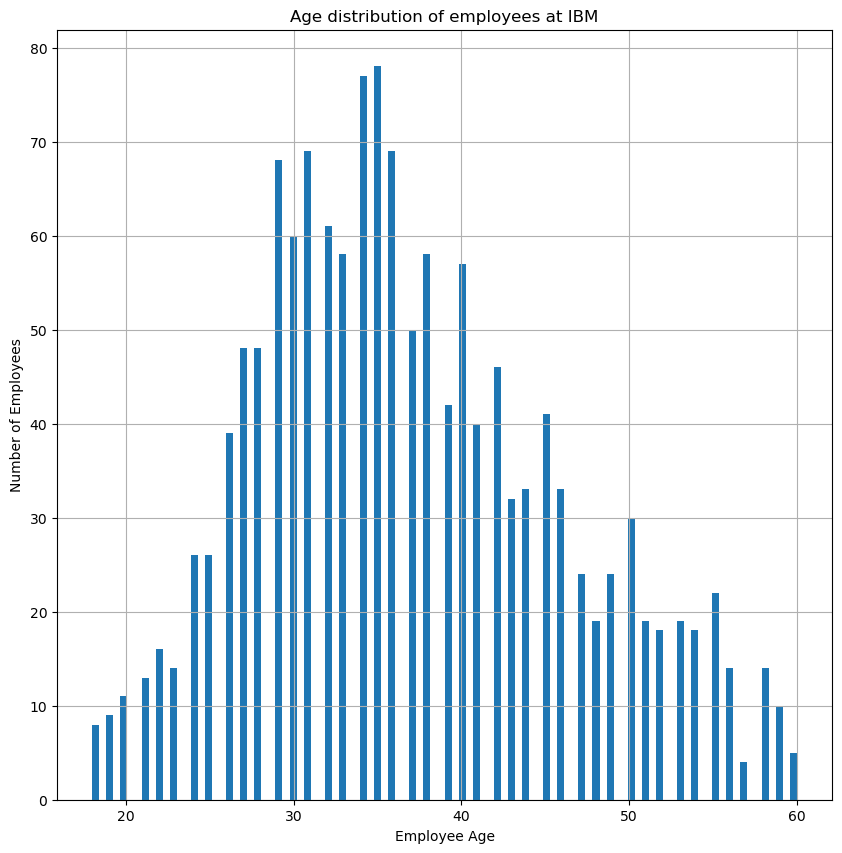

In [5]:
#age distribution of employees at IBM
plt.figure(figsize=(10,10))
ads["Age"].hist(bins=100)
plt.title("Age distribution of employees at IBM")
plt.xlabel("Employee Age")
plt.ylabel("Number of Employees")
plt.show()

C:\Users\Jon\AppData\Local\Temp\ipykernel_7028\1856636840.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True,axis="y")


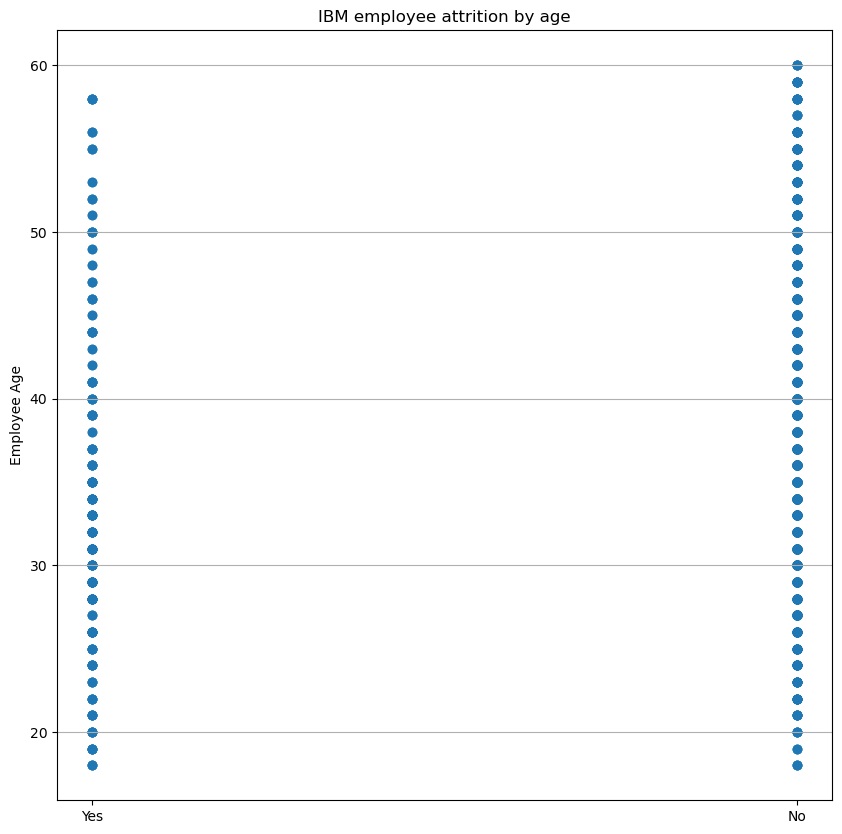

In [9]:
#attrition by age
plt.figure(figsize=(10,10))
plt.scatter(ads.Attrition,ads.Age)
plt.title("IBM employee attrition by age")
plt.ylabel("Employee Age")
plt.grid(b=True,axis="y")
plt.show()

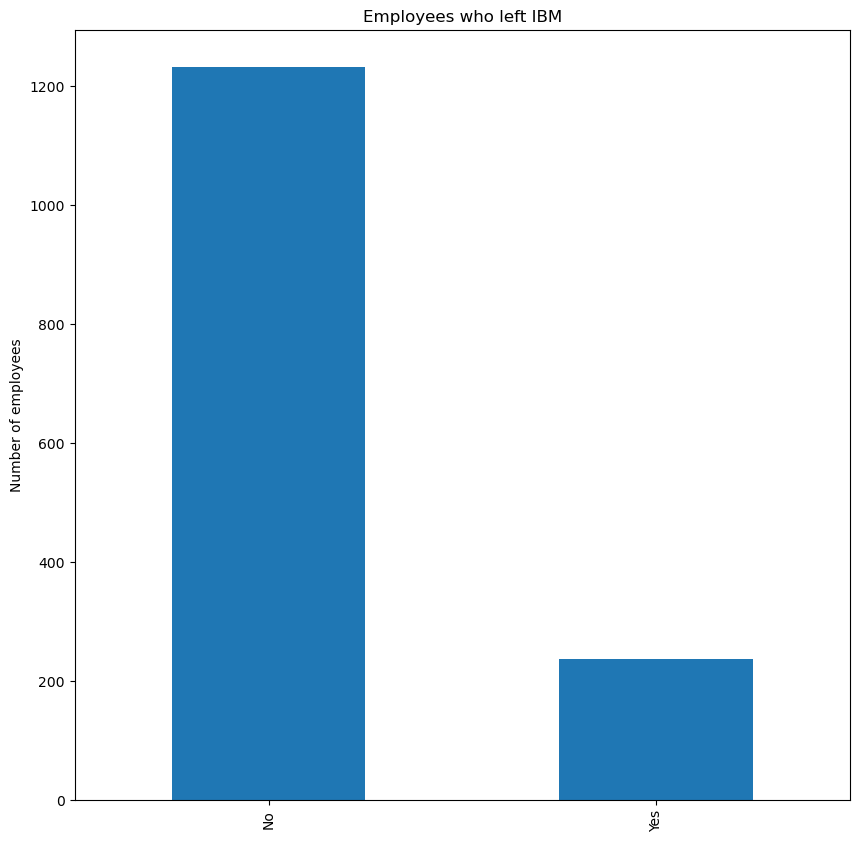

In [12]:
#employees who left
plt.figure(figsize=(10,10))
ads.Attrition.value_counts().plot(kind="bar")
plt.title("Employees who left IBM")
plt.ylabel("Number of employees")
plt.show()

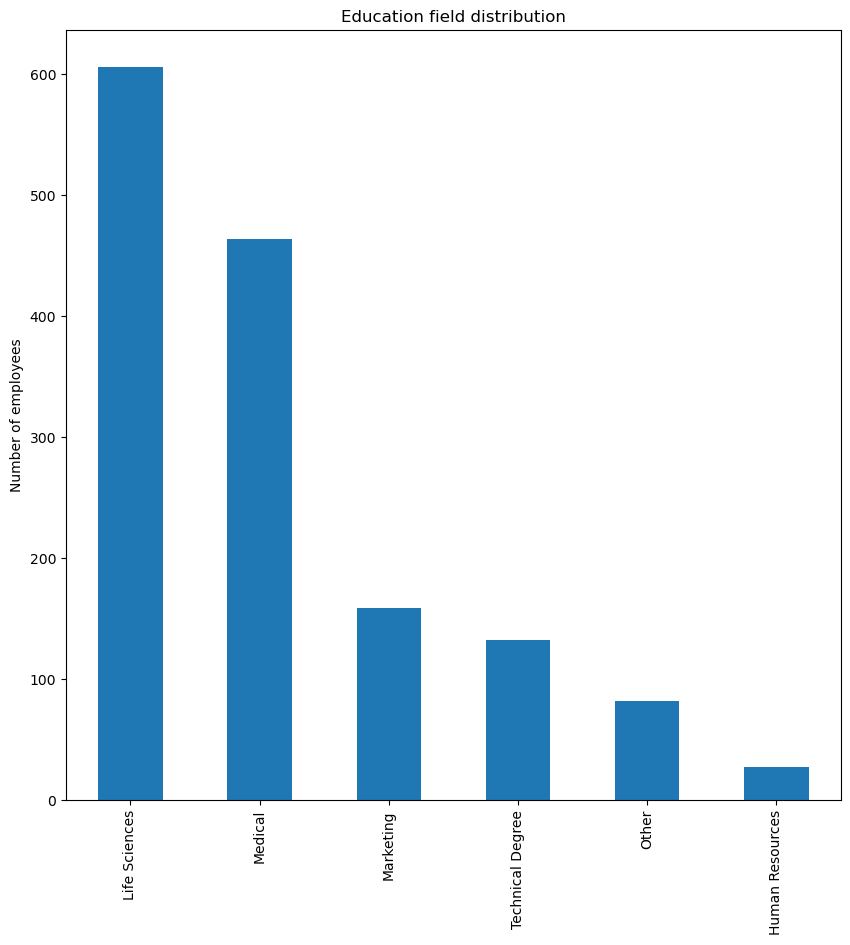

In [13]:
#education field distribution
plt.figure(figsize=(10,10))
ads.EducationField.value_counts().plot(kind="bar")
plt.title("Education field distribution")
plt.ylabel("Number of employees")
plt.show()

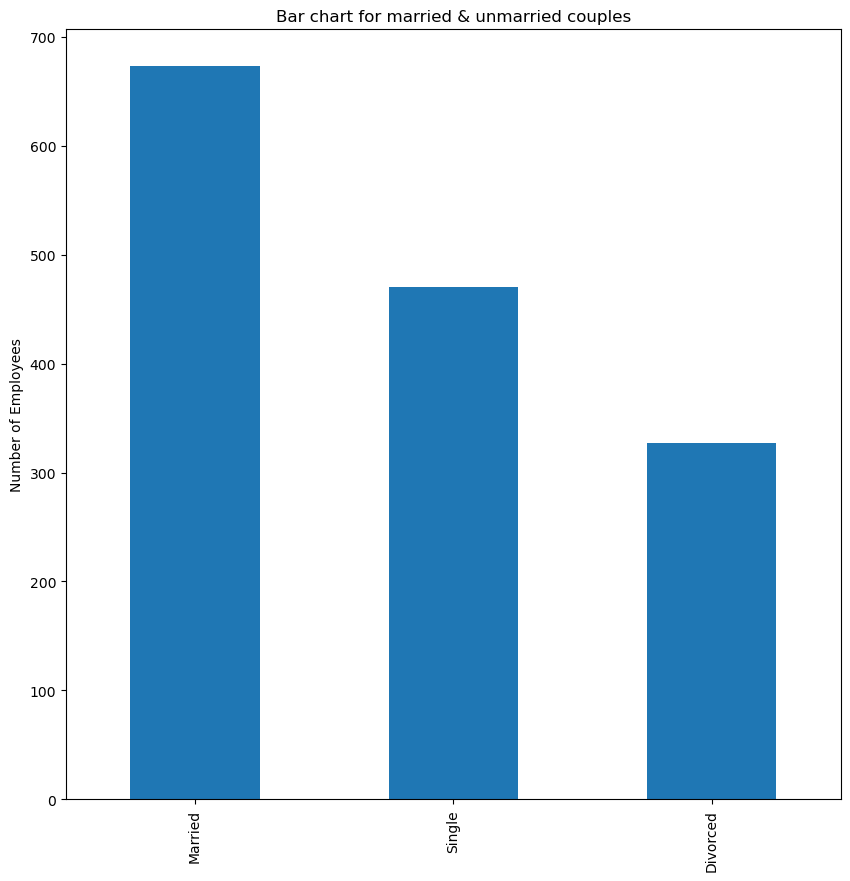

In [14]:
#bar chart for married & unmarried couples
plt.figure(figsize=(10,10))
ads.MaritalStatus.value_counts().plot(kind="bar")
plt.title("Bar chart for married & unmarried couples")
plt.ylabel("Number of Employees")
plt.show()

In [15]:
ads['Attrition'].replace('Yes',1, inplace=True)
ads['Attrition'].replace('No',0, inplace=True)

In [16]:
#regression model to predict employee attrition
X=ads.drop(["Attrition"],axis=1)
X.head()
Y=ads["Attrition"]
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [17]:
ads.head(100)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,0,Research & Development,2,4,Technical Degree,1,3,Married,13549,9,1,4
96,24,0,Sales,3,2,Other,1,3,Married,4999,0,2,3
97,28,0,Sales,4,3,Medical,2,3,Married,4221,1,4,5
98,58,0,Sales,10,4,Medical,4,3,Single,13872,0,2,37


In [18]:
ads["EducationField"].replace("Life Sciences", 1, inplace=True)
ads["EducationField"].replace("Marketing", 2, inplace=True)
ads["EducationField"].replace("Technical degree", 3, inplace=True)
ads["EducationField"].replace("Medical", 4, inplace=True)
ads["EducationField"].replace("Other", 5, inplace=True)
ads["EducationField"].replace("Human Resources", 6, inplace=True)

In [19]:
ads["EducationField"].value_counts()

1                   606
4                   464
2                   159
Technical Degree    132
5                    82
6                    27
Name: EducationField, dtype: int64

In [20]:
ads["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [21]:
ads["Department"].replace("Research & Development", 1, inplace=True)
ads["Department"].replace("Sales", 2, inplace=True)
ads["Department"].replace("Human Resources", 3, inplace=True)

In [22]:
ads["Department"].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [23]:
ads["MaritalStatus"].replace("Married", 1, inplace=True)
ads["MaritalStatus"].replace("Single", 2, inplace=True)
ads["MaritalStatus"].replace("Divorced", 3, inplace=True)

In [24]:
ads["MaritalStatus"].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [25]:
x=ads.select_dtypes(include=["int64"])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [26]:
y=ads["Attrition"]

In [27]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [28]:
y, x = dmatrices("Attrition ~ Age + Department +  DistanceFromHome + Education + EducationField + \
YearsAtCompany", ads, return_type="dataframe")
print(x.columns)

Index(['Intercept', 'EducationField[T.2]', 'EducationField[T.4]',
       'EducationField[T.5]', 'EducationField[T.6]',
       'EducationField[T.Technical Degree]', 'Age', 'Department',
       'DistanceFromHome', 'Education', 'YearsAtCompany'],
      dtype='object')


In [29]:
y = np.ravel(y)

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model=model.fit(x,y)
model.score(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8401360544217688

In [31]:
y.mean()

0.16122448979591836

In [32]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2=LogisticRegression()
model2.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predicted=model2.predict(X_test)
print(predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [34]:
check=model2.predict_proba(X_test)
print(check)

[[0.8959445  0.1040555 ]
 [0.78407727 0.21592273]
 [0.68921023 0.31078977]
 [0.82130932 0.17869068]
 [0.70271832 0.29728168]
 [0.82825849 0.17174151]
 [0.89293787 0.10706213]
 [0.82231874 0.17768126]
 [0.96436282 0.03563718]
 [0.92786671 0.07213329]
 [0.96228126 0.03771874]
 [0.86413174 0.13586826]
 [0.84180035 0.15819965]
 [0.84625852 0.15374148]
 [0.9108877  0.0891123 ]
 [0.87405194 0.12594806]
 [0.86750939 0.13249061]
 [0.754591   0.245409  ]
 [0.7808491  0.2191509 ]
 [0.91043169 0.08956831]
 [0.67109472 0.32890528]
 [0.95880833 0.04119167]
 [0.89479076 0.10520924]
 [0.82891399 0.17108601]
 [0.53857386 0.46142614]
 [0.80264474 0.19735526]
 [0.9077736  0.0922264 ]
 [0.92681587 0.07318413]
 [0.74030217 0.25969783]
 [0.83364714 0.16635286]
 [0.86187099 0.13812901]
 [0.80891565 0.19108435]
 [0.88943188 0.11056812]
 [0.96717081 0.03282919]
 [0.87667623 0.12332377]
 [0.89500314 0.10499686]
 [0.88077985 0.11922015]
 [0.74140613 0.25859387]
 [0.92965329 0.07034671]
 [0.78274876 0.21725124]


In [35]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,check[:,1]))

0.8435374149659864
0.646207162110127


In [36]:
print(metrics.confusion_matrix(y_test,predicted))
print(metrics.classification_report(y_test,predicted))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [37]:
#create variable to test with random variables
test1=[[4.0,2.0,3.0,10.0,24.0,12.0,8.0,6.0,13.0,17.0,16.0]]
print(model.predict_proba(test1))

[[2.65902233e-04 9.99734098e-01]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
